<a href="https://colab.research.google.com/github/imrankhan20003/Machine-Learning-with-GEE-/blob/main/Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
perform complete EDA on the following file and implement a linear regression model to this  dataset

Here is all the data you need:
"Salary_Data.csv"

## Data loading

### Subtask:
Load the "Salary_Data.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "Salary_Data.csv" file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Salary_Data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Salary_Data.csv' not found.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


(30, 2)


## Data exploration

### Subtask:
Explore the dataset, including checking the shape, data types, summary statistics (mean, median, std, etc.), and identifying missing values. Also, visualize the distribution of each feature using histograms and box plots.


**Reasoning**:
Explore the dataset by checking its shape, data types, summary statistics, missing values, and visualize the distribution of features using histograms and box plots.



Shape of the DataFrame: (30, 2)

Data types of each column:
 YearsExperience    float64
Salary             float64
dtype: object

Descriptive statistics:
        YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

Missing values per column:
 YearsExperience    0
Salary             0
dtype: int64


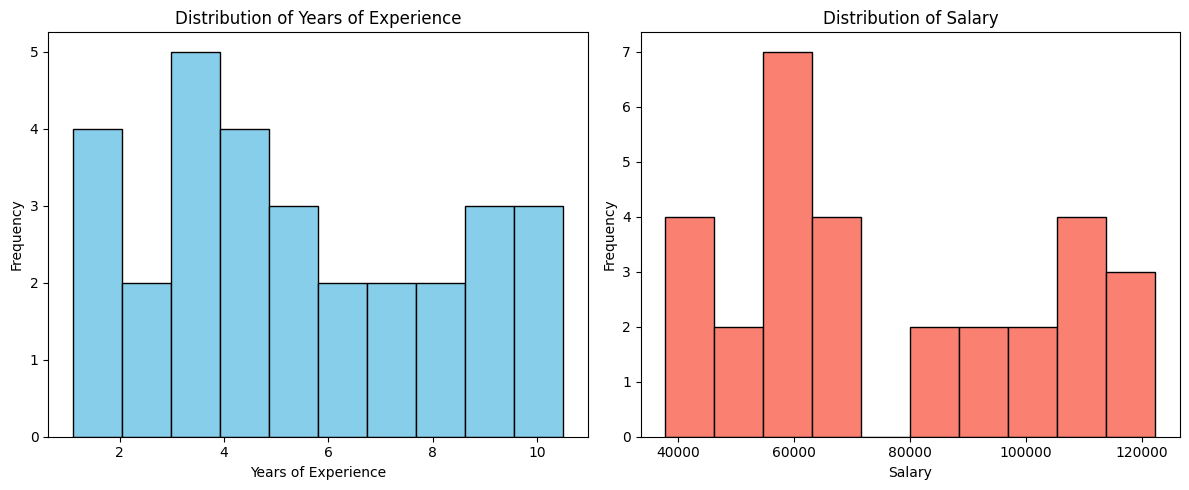

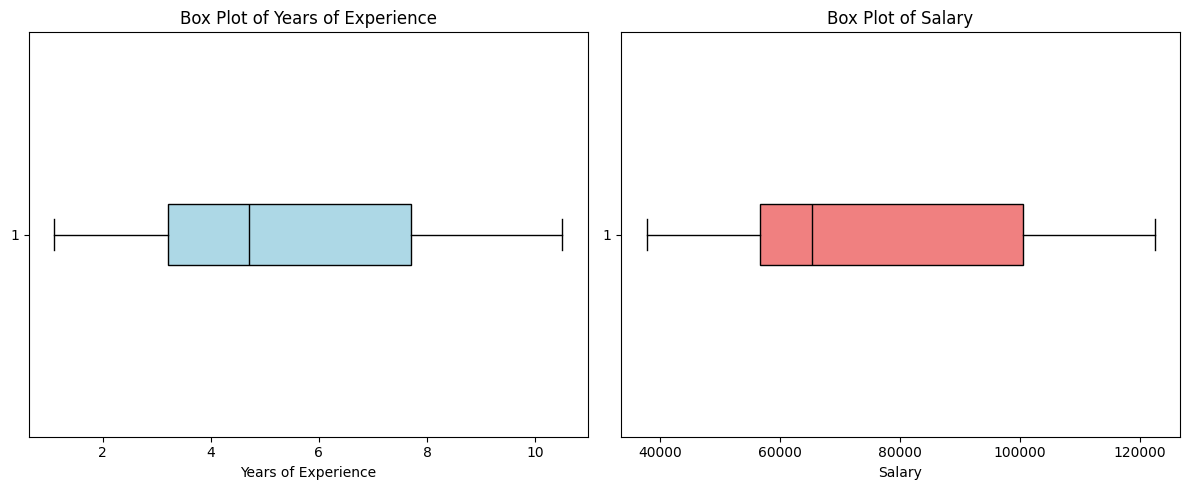

In [2]:
import matplotlib.pyplot as plt

# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine the data types of each column
print("\nData types of each column:\n", df.dtypes)

# Generate descriptive statistics
print("\nDescriptive statistics:\n", df.describe())

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Create histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['YearsExperience'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience')

plt.subplot(1, 2, 2)
plt.hist(df['Salary'], bins=10, color='salmon', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.tight_layout()
plt.show()

# Generate box plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['YearsExperience'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='black'))
plt.xlabel('Years of Experience')
plt.title('Box Plot of Years of Experience')

plt.subplot(1, 2, 2)
plt.boxplot(df['Salary'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightcoral'),
            medianprops=dict(color='black'))
plt.xlabel('Salary')
plt.title('Box Plot of Salary')
plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Visualize the relationship between 'YearsExperience' and 'Salary' and check for potential outliers or non-linear relationships.


**Reasoning**:
Visualize the relationship between 'YearsExperience' and 'Salary' using a scatter plot and check for potential outliers or non-linear relationships. Add labels, title, and optionally a regression line.



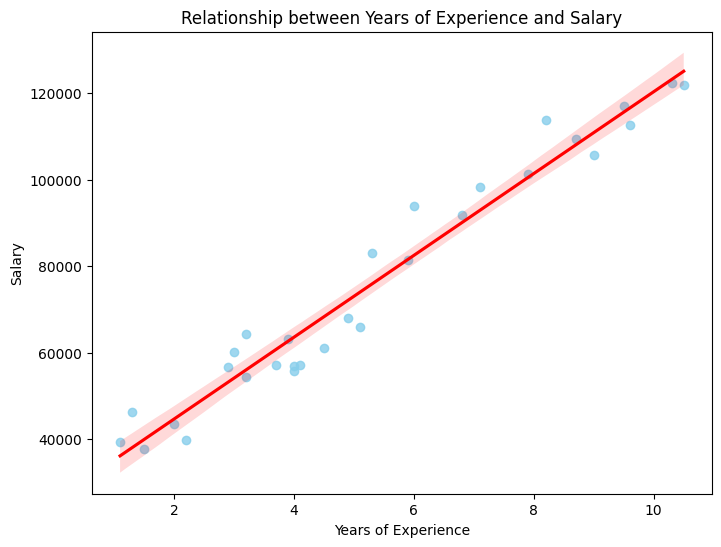

Pearson correlation coefficient: 0.98
P-value: 0.000


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x='YearsExperience', y='Salary', data=df,
            scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Relationship between Years of Experience and Salary')
plt.show()

# Calculate and print the Pearson correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(df['YearsExperience'], df['Salary'])
print(f"Pearson correlation coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.3f}")

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using the `train_test_split` function.



In [4]:
from sklearn.model_selection import train_test_split

X = df['YearsExperience']
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train a linear regression model on the training data.


**Reasoning**:
Train a linear regression model using the training data.



In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
if isinstance(X_train, pd.Series):
    X_train = X_train.values.reshape(-1,1)
model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the trained linear regression model's performance on the test set and visualize the results.


**Reasoning**:
Evaluate the model, calculate the metrics, and visualize the results as per the instructions.



R-squared: 0.902
Mean Squared Error: 49830096.856
Root Mean Squared Error: 7059.044


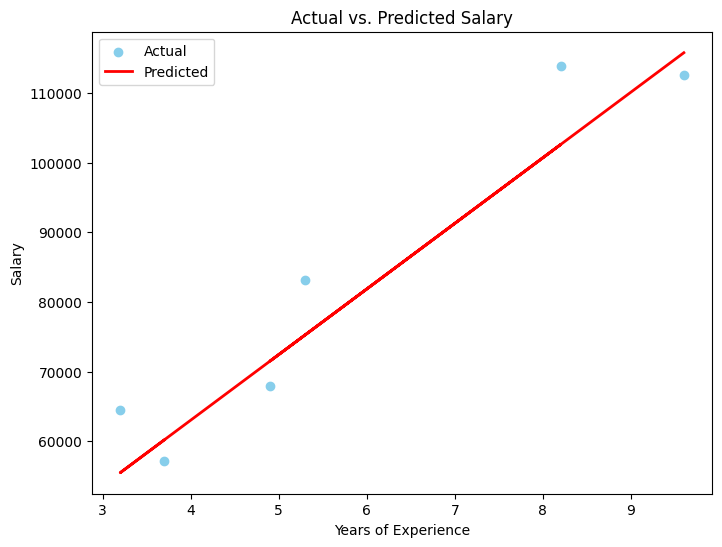


Evaluation Metrics Summary:
- R-squared: 0.902
- Mean Squared Error: 49830096.856
- Root Mean Squared Error: 7059.044

Interpretation:
The R-squared value indicates the proportion of variance in the dependent variable (Salary) that is predictable from the independent variable (Years of Experience). A higher R-squared value suggests a better fit of the model to the data.
The Mean Squared Error and Root Mean Squared Error represent the average squared difference and the square root of the average squared difference between the actual and predicted values, respectively. Lower values of MSE and RMSE generally indicate better model performance.


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Make predictions on the test set
if isinstance(X_test, pd.Series):
    X_test = X_test.values.reshape(-1, 1)
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='skyblue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs. Predicted Salary')
plt.legend()
plt.show()

print("\nEvaluation Metrics Summary:")
print(f"- R-squared: {r2:.3f}")
print(f"- Mean Squared Error: {mse:.3f}")
print(f"- Root Mean Squared Error: {rmse:.3f}")

print("\nInterpretation:")
print("The R-squared value indicates the proportion of variance in the dependent variable (Salary) that is predictable from the independent variable (Years of Experience). A higher R-squared value suggests a better fit of the model to the data.")
print("The Mean Squared Error and Root Mean Squared Error represent the average squared difference and the square root of the average squared difference between the actual and predicted values, respectively. Lower values of MSE and RMSE generally indicate better model performance.")

## Summary:

### 1. Q&A

* **What is the relationship between Years of Experience and Salary?**  Years of Experience and Salary have a strong positive linear relationship. The Pearson correlation coefficient is 0.98, indicating a highly significant relationship (p-value = 0.000).

* **How well does the linear regression model perform?** The model's performance is reasonably good. The R-squared value is 0.902, indicating that approximately 90.2% of the variance in salary can be explained by years of experience.  The RMSE is approximately 7059, representing the average difference between predicted and actual salaries.


### 2. Data Analysis Key Findings

* **Strong Positive Correlation:** A strong positive linear relationship exists between 'YearsExperience' and 'Salary' (Pearson correlation coefficient: 0.98, p-value: 0.000).
* **High R-squared Value:** The linear regression model exhibits a high R-squared value of 0.902 on the test set, suggesting a good fit to the data.
* **RMSE of 7059:** The model has a Root Mean Squared Error (RMSE) of approximately 7059, indicating the average difference between predicted and actual salaries.  
* **No Missing Values:** The dataset contains no missing values.
* **Salary Distribution:** The salary distribution appears somewhat right-skewed.


### 3. Insights or Next Steps

* **Feature Engineering:** Explore potential non-linear transformations of 'YearsExperience' to see if a non-linear model might improve the fit, though the current linear model is already performing well.
* **Additional Features:** Consider incorporating additional features (e.g., education level, job title, location) to potentially improve model accuracy and explain more of the variance in salary.


In [7]:
import pandas as pd
import numpy as np

In [8]:
df= pd.read_csv('/content/Salary_Data.csv')

In [13]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
df.sample(10)

,YearsExperience,Salary
17,5.3,83088.0
16,5.1,66029.0
27,9.6,112635.0
24,8.7,109431.0
6,3.0,60150.0
18,5.9,81363.0
28,10.3,122391.0
1,1.3,46205.0
20,6.8,91738.0
13,4.1,57081.0


In [12]:
df.shape

(30, 2)

In [15]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [18]:
df.sum()

,0
YearsExperience,159.4
Salary,2280090.0


In [19]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [21]:
x=df.drop(columns=['Salary'])
y=df['Salary']
